In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

In [ ]:
X1, Y1 = make_blobs(n_features=2, centers=3, random_state=43, cluster_std=0.5)
Y1=Y1.reshape(-1,1)
X=np.hstack((X1,Y1))

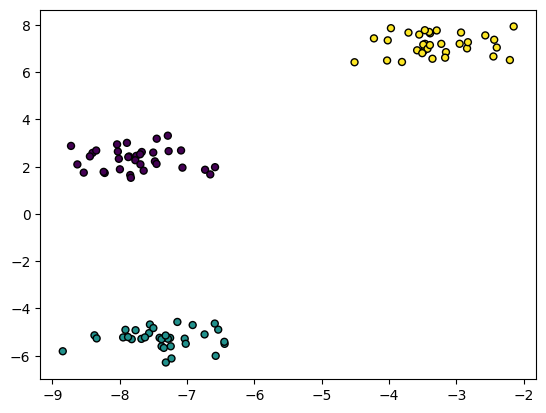

In [ ]:
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.show()

# Maximum Likelihood

Excercise: Estimate the mean and variance (or standrad deviation) for the x and y coordinates of the points in each clusters, assuming a normal distribution.

In [ ]:
class Estimator:
  # State
  mean = 0
  var = 0
  t = 0
  memo = []

  def estimate(this, sample, learning_rate):
    this.t += 1
    diff = sample - this.mean
    this.mean += learning_rate(this.t) * diff
    this.var += learning_rate(this.t) * (diff ** 2 - this.var)
    this.memo.append({"mean": this.mean, "var": this.var})

  def getMean(this):
    return this.mean

  def getStd(this):
    return this.var ** 0.5

  def getVar(this):
    return this.var

In [ ]:
def estimate(dist, learning_rate, estimator = None, epsilon = 1e-10):
  """
  Given a vector, this function uses the Estimator class to
  estimate the mean and variance of the distribution and returns
  a dictionary with these values (and the standard deviation)
  """
  if estimator == None:
    estimator = Estimator()
  for i, x in enumerate(dist):
    estimator.estimate(x, learning_rate)

    # Check for convergence
    if i > 1:
      mean, prev_mean = estimator.memo[i]["mean"], estimator.memo[i - 1]["mean"]
      var, prev_var = estimator.memo[i]["var"], estimator.memo[i - 1]["var"]
      if abs(mean - prev_mean) < epsilon and abs(var - prev_var) < epsilon:
        return

def showResults(estimator, distribution):
  mean_values = [v["mean"] for v in estimator.memo]
  var_values = [v["var"] for v in estimator.memo]

  iters_range = np.arange(len(mean_values))
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].set_title(f"{distribution}: mean values per iter")
  axes[0].plot(iters_range,
               mean_values,
               'salmon',
               linewidth=2)
  axes[1].set_title(f"{distribution}: var values per iter")
  axes[1].plot(iters_range,
               var_values,
               'blue',
               linewidth=2);
  print(distribution)
  print(f"Iters: {estimator.t}")
  print(f"Mean: {estimator.getMean()}")
  print(f"Var: {estimator.getVar()}")
  print(f"Std: {estimator.getStd()}")
  print('-'*40)

Learning Rate: $\frac{1}{t}$

Cluster 0, X
Iters: 34
Mean: -7.755850286607258
Var: 1.8698387119209494
Std: 1.3674204590837997
----------------------------------------
Cluster 0, Y
Iters: 34
Mean: 2.321010771877286
Var: 0.5654625137501206
Std: 0.7519724155513423
----------------------------------------
Cluster 1, X
Iters: 33
Mean: -7.375141984114882
Var: 1.6144741405706966
Std: 1.2706195892440415
----------------------------------------
Cluster 1, Y
Iters: 33
Mean: -5.2700933448410625
Var: 1.0921259190573178
Std: 1.0450482855147496
----------------------------------------
Cluster 2, X
Iters: 33
Mean: -3.2842996861753244
Var: 0.7609275651977163
Std: 0.8723116216110596
----------------------------------------
Cluster 2, Y
Iters: 33
Mean: 7.176902248957355
Var: 1.679595523340347
Std: 1.2959921000300685
----------------------------------------


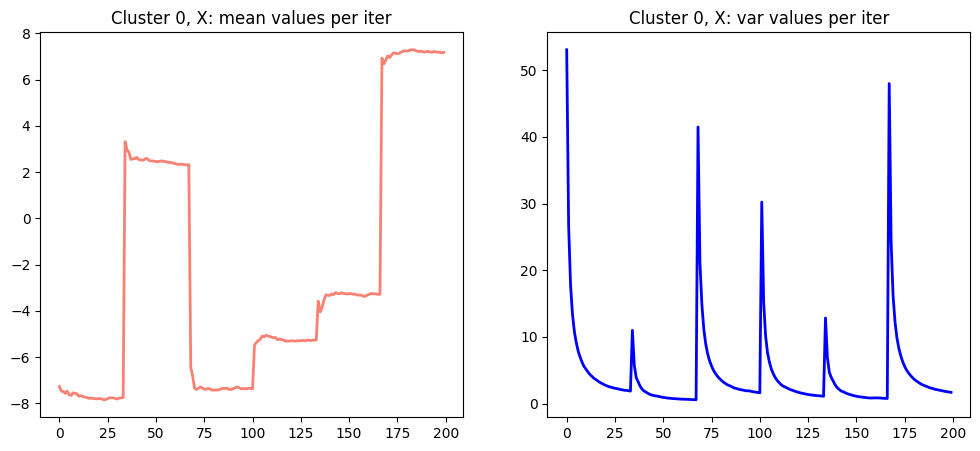

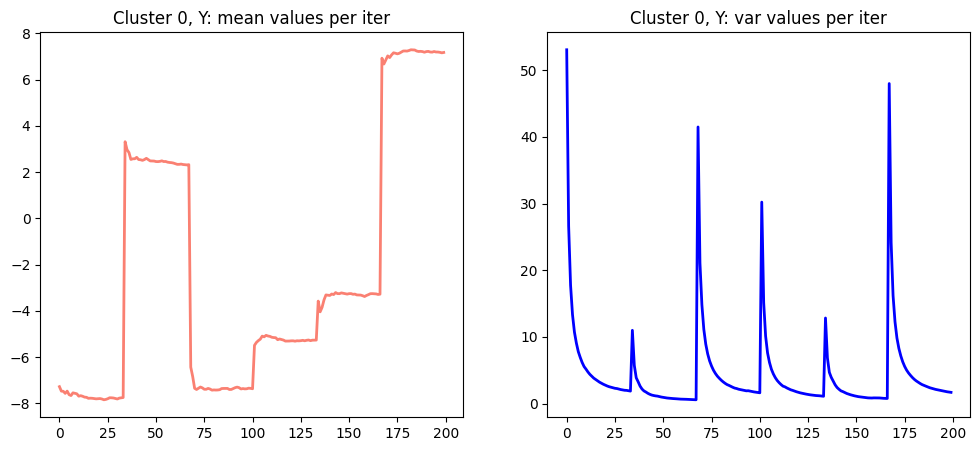

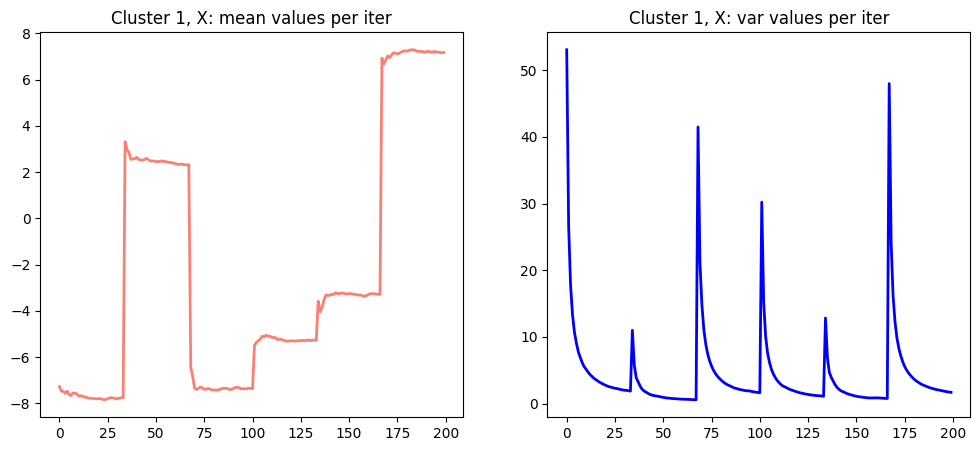

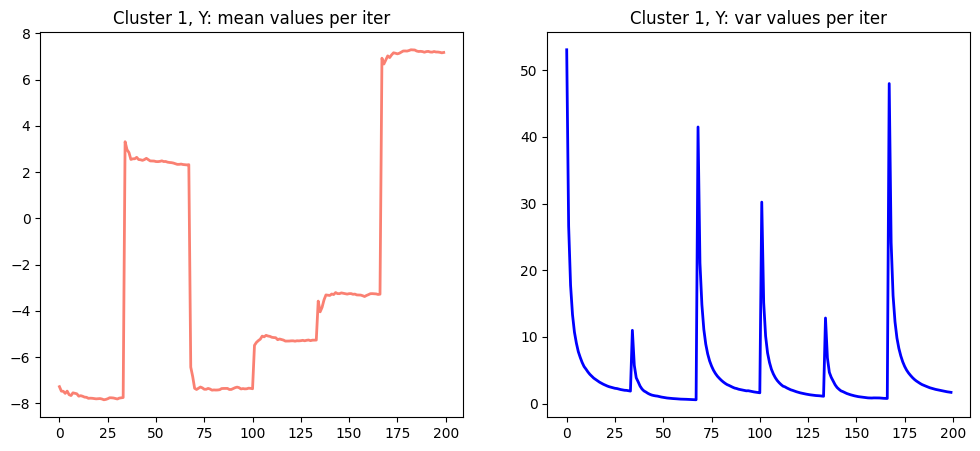

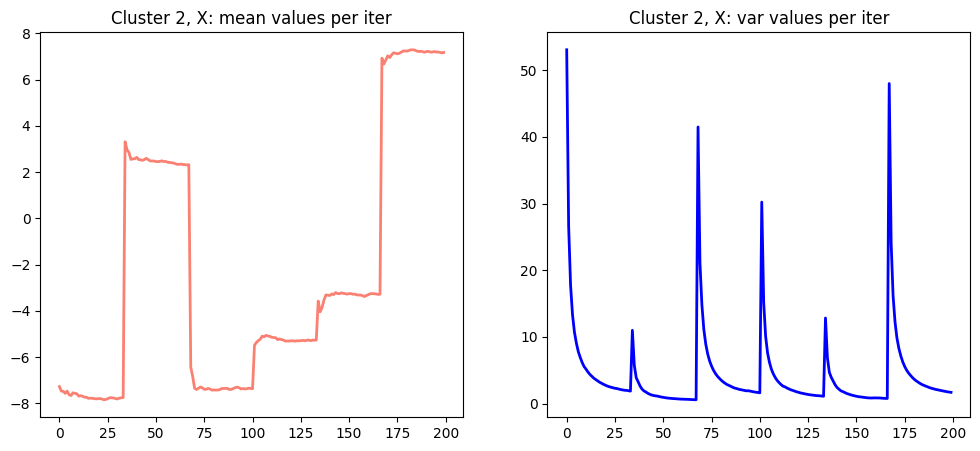

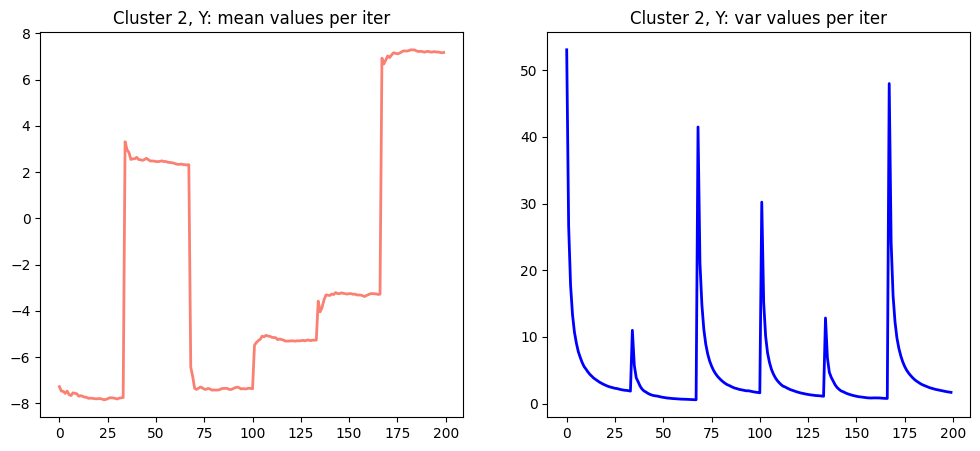

In [ ]:
import threading # is it necessary? Absolutely not 😎

# Get distributions filtering by cluster and selecting column (for x and y)
x_dists = [X[X[:,2]==clusterId][:, 0] for clusterId in range(3)]
y_dists = [X[X[:,2]==clusterId][:, 1] for clusterId in range(3)]

x_estimators1 = [Estimator() for _ in x_dists]
x_threads = [
    threading.Thread(
        target=estimate,
        args=(dist, lambda x: 1/x, x_estimators1[i]))
    for i, dist in enumerate(x_dists)
]

y_estimators1 = [Estimator() for _ in y_dists]
y_threads = [
    threading.Thread(
        target=estimate,
        args=(dist, lambda x: 1/x, y_estimators1[i]))
    for i, dist in enumerate(y_dists)
]

# Start and wait for threads
[x.start() or y.start() for x, y in zip(x_threads, y_threads)]
[x.join() or y.join() for x, y in zip(x_threads, y_threads)]

for i, (x_estimator, y_estimator) in enumerate(zip(x_estimators1, y_estimators1)):
  showResults(x_estimator, f"Cluster {i}, X")
  showResults(y_estimator, f"Cluster {i}, Y")

Learning rate: 0.1

Cluster 0, X
Iters: 34
Mean: -7.463111234414442
Var: 2.169688209034115
Std: 1.472986153714323
----------------------------------------
Cluster 0, Y
Iters: 34
Mean: 2.135861464239956
Var: 0.32132317553182177
Std: 0.5668537514490151
----------------------------------------
Cluster 1, X
Iters: 33
Mean: -7.170821910965258
Var: 2.22540695666071
Std: 1.4917797949632883
----------------------------------------
Cluster 1, Y
Iters: 33
Mean: -5.081244211106132
Var: 1.1152039813239296
Std: 1.0560321876363095
----------------------------------------
Cluster 2, X
Iters: 33
Mean: -3.1623582264581573
Var: 0.742514943771173
Std: 0.8616930681925978
----------------------------------------
Cluster 2, Y
Iters: 33
Mean: 6.902179057810125
Var: 1.9398719001536175
Std: 1.392792841794363
----------------------------------------


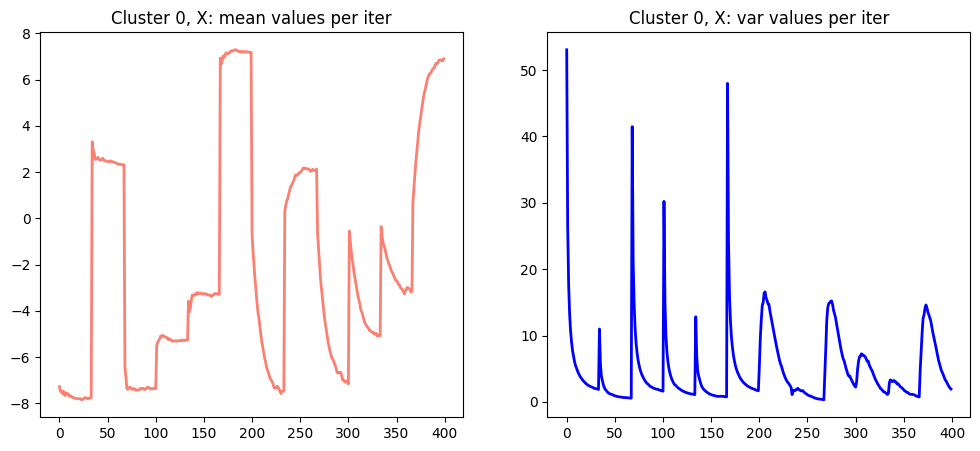

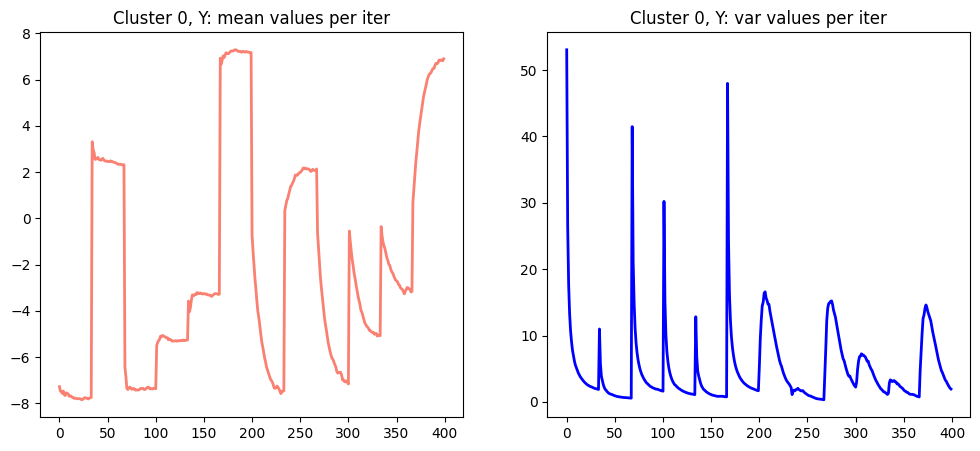

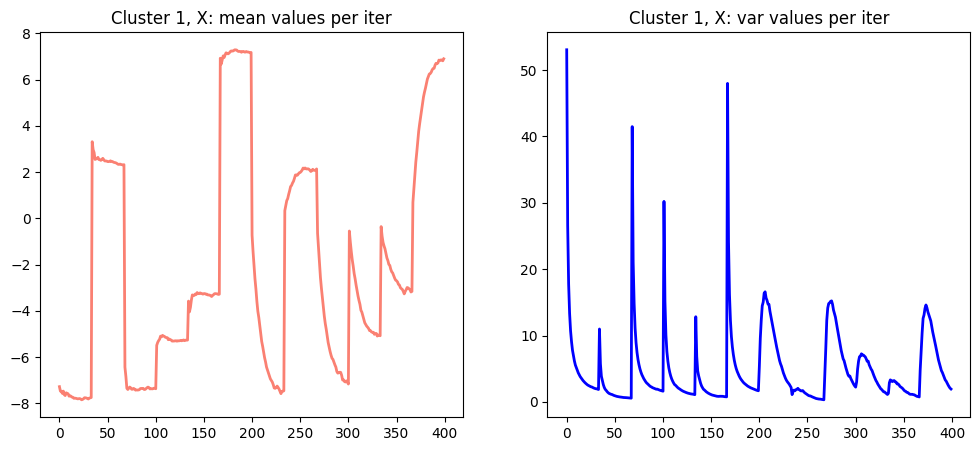

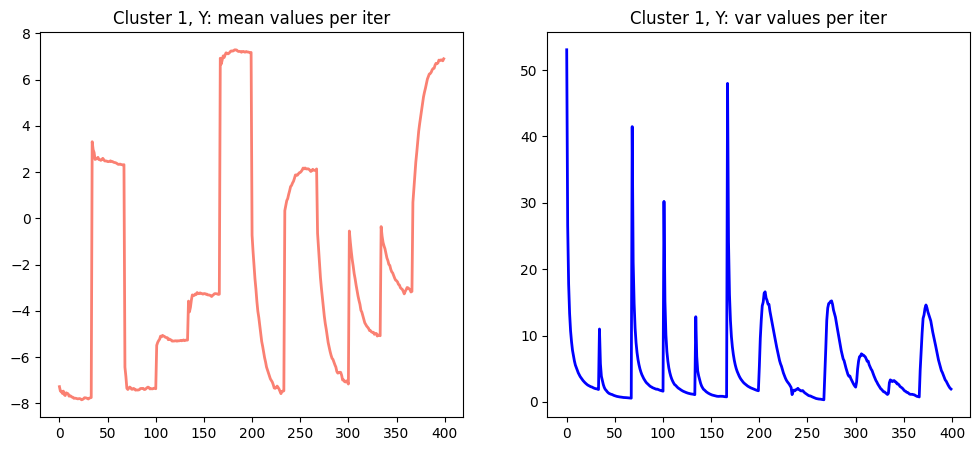

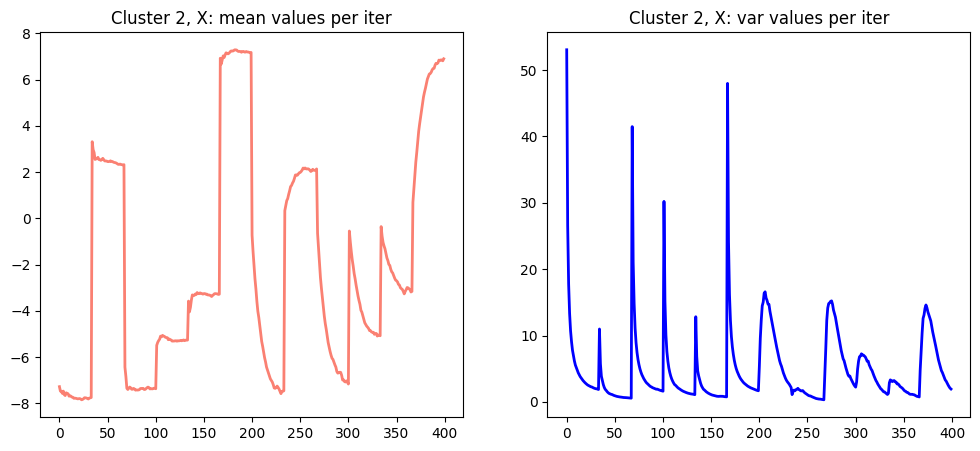

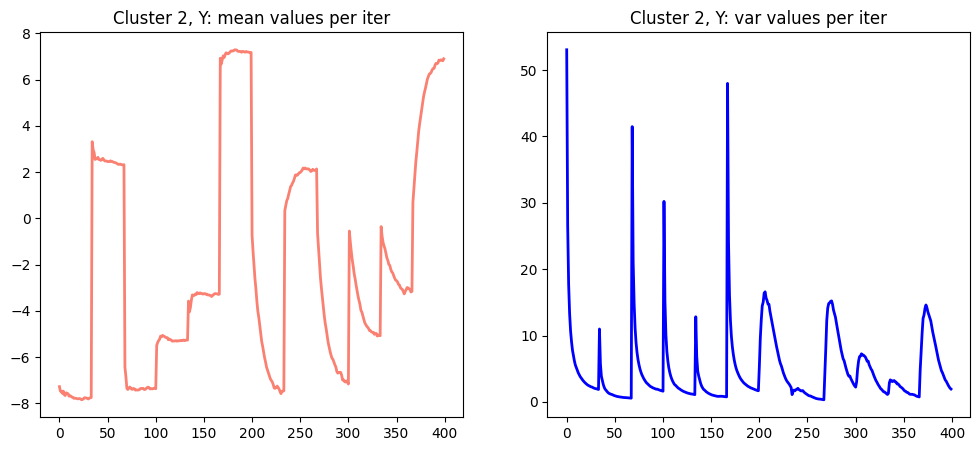

In [ ]:
x_estimators2 = [Estimator() for _ in x_dists]
x_threads = [
    threading.Thread(
        target=estimate,
        args=(dist, lambda x: 0.1, x_estimators2[i]))
    for i, dist in enumerate(x_dists)
]

y_estimators2 = [Estimator() for _ in y_dists]
y_threads = [
    threading.Thread(
        target=estimate,
        args=(dist, lambda x: 0.1, y_estimators2[i]))
    for i, dist in enumerate(y_dists)
]

# Start and wait for threads
[x.start() or y.start() for x, y in zip(x_threads, y_threads)]
[x.join() or y.join() for x, y in zip(x_threads, y_threads)]

for i, (x_estimator, y_estimator) in enumerate(zip(x_estimators2, y_estimators2)):
  showResults(x_estimator, f"Cluster {i}, X")
  showResults(y_estimator, f"Cluster {i}, Y")

Learning rate: 0.01

Cluster 0, X
Iters: 34
Mean: -2.244217620687692
Var: 12.574627767151975
Std: 3.546072160454716
----------------------------------------
Cluster 0, Y
Iters: 34
Mean: 0.6668537448156373
Var: 1.1631970678823873
Std: 1.0785161416883788
----------------------------------------
Cluster 1, X
Iters: 33
Mean: -2.08210122775824
Var: 11.224922632348044
Std: 3.3503615674055305
----------------------------------------
Cluster 1, Y
Iters: 33
Mean: -1.487627651434461
Var: 5.731107685990375
Std: 2.393973200766954
----------------------------------------
Cluster 2, X
Iters: 33
Mean: -0.9263851685405073
Var: 2.297137800013908
Std: 1.5156311556621909
----------------------------------------
Cluster 2, Y
Iters: 33
Mean: 2.024637435211869
Var: 10.586637276962213
Std: 3.2537113081775115
----------------------------------------


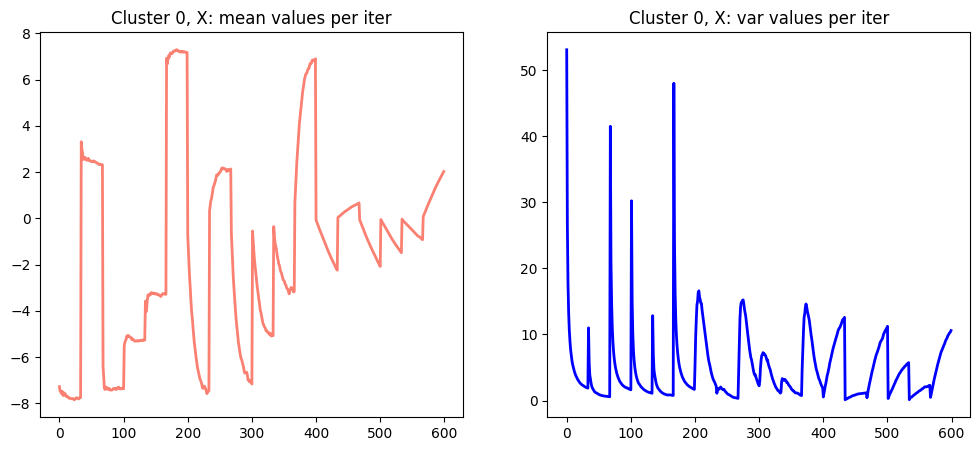

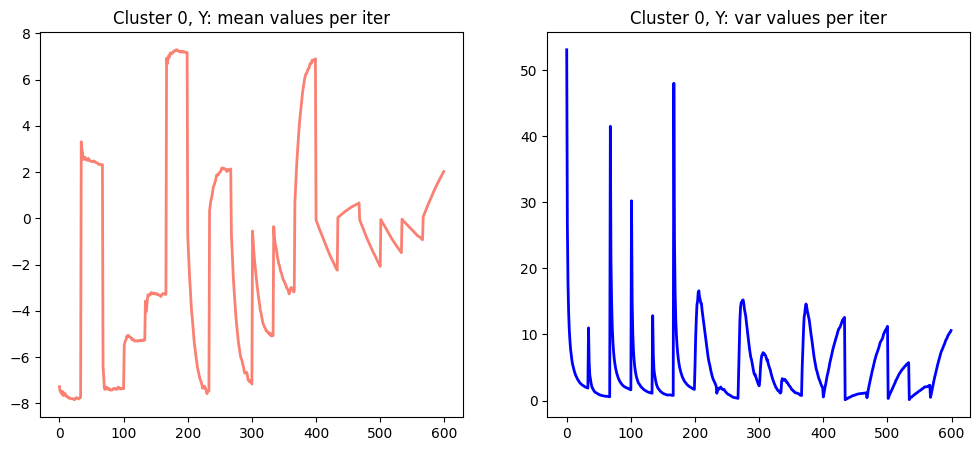

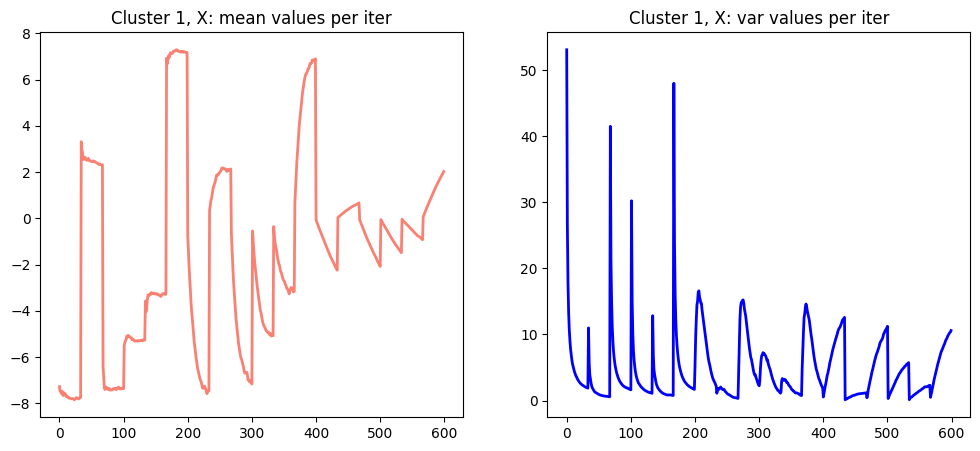

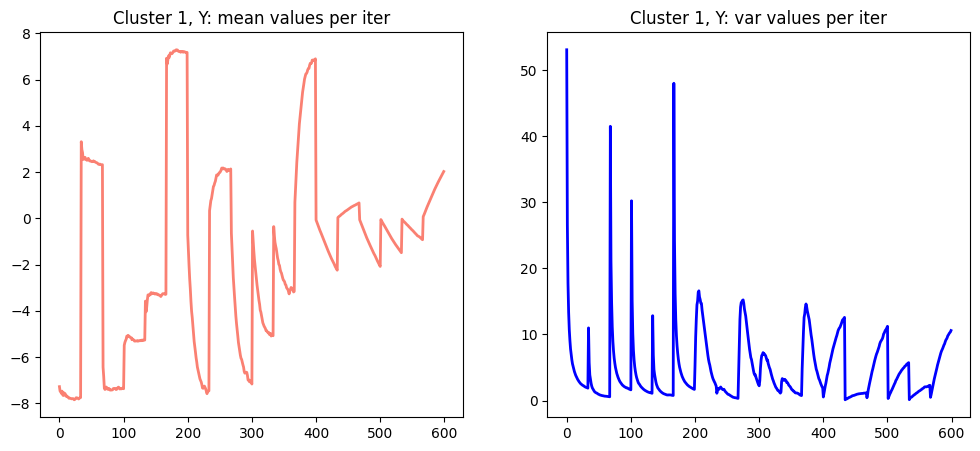

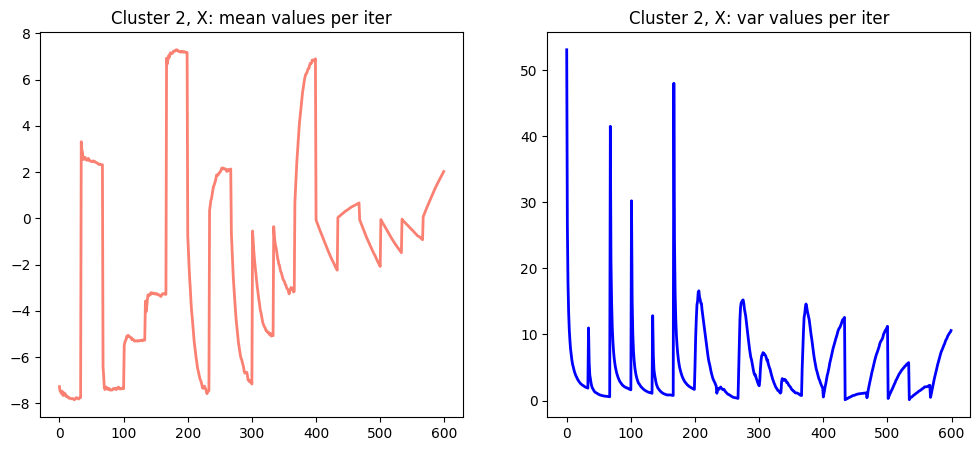

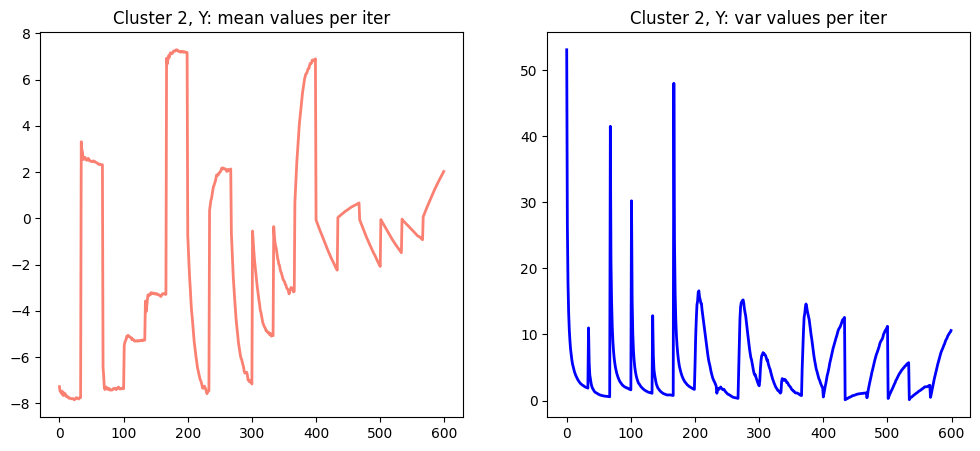

In [ ]:
x_estimators3 = [Estimator() for _ in x_dists]
x_threads = [
    threading.Thread(
        target=estimate,
        args=(dist, lambda x: 0.01, x_estimators3[i]))
    for i, dist in enumerate(x_dists)
]

y_estimators3 = [Estimator() for _ in y_dists]
y_threads = [
    threading.Thread(
        target=estimate,
        args=(dist, lambda x: 0.01, y_estimators3[i]))
    for i, dist in enumerate(y_dists)
]

# Start and wait for threads
[x.start() or y.start() for x, y in zip(x_threads, y_threads)]
[x.join() or y.join() for x, y in zip(x_threads, y_threads)]

for i, (x_estimator, y_estimator) in enumerate(zip(x_estimators3, y_estimators3)):
  showResults(x_estimator, f"Cluster {i}, X")
  showResults(y_estimator, f"Cluster {i}, Y")

Learning rate: 0.001

Cluster 0, X
Iters: 34
Mean: -0.2593883320612534
Var: 1.9559665808431317
Std: 1.3985587513019007
----------------------------------------
Cluster 0, Y
Iters: 34
Mean: 0.07756814801825437
Var: 0.1811409344759877
Std: 0.4256065489110661
----------------------------------------
Cluster 1, X
Iters: 33
Mean: -0.2395290335316891
Var: 1.7210290972169506
Std: 1.3118799858283343
----------------------------------------
Cluster 1, Y
Iters: 33
Mean: -0.17116062189843337
Var: 0.8789097893005224
Std: 0.9375018876250449
----------------------------------------
Cluster 2, X
Iters: 33
Mean: -0.10665770833389951
Var: 0.3497509664239923
Std: 0.5913974690713448
----------------------------------------
Cluster 2, Y
Iters: 33
Mean: 0.23307471743857486
Var: 1.626523909834292
Std: 1.2753524649422574
----------------------------------------


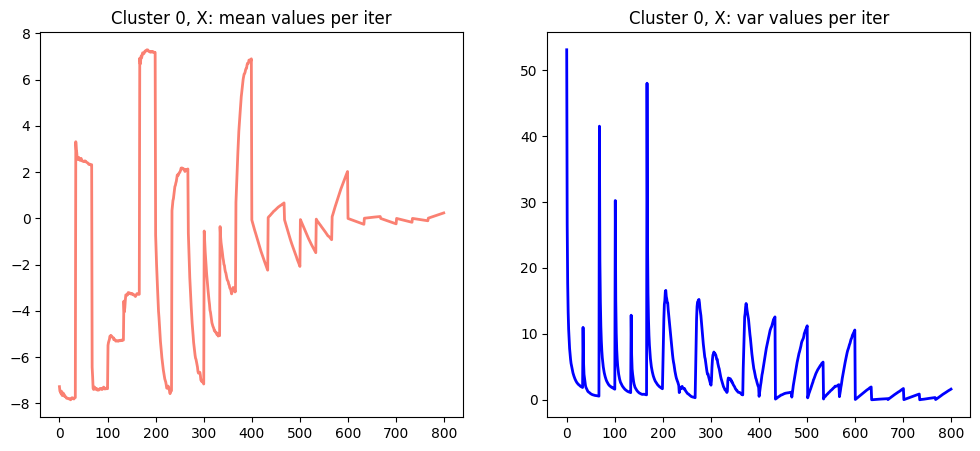

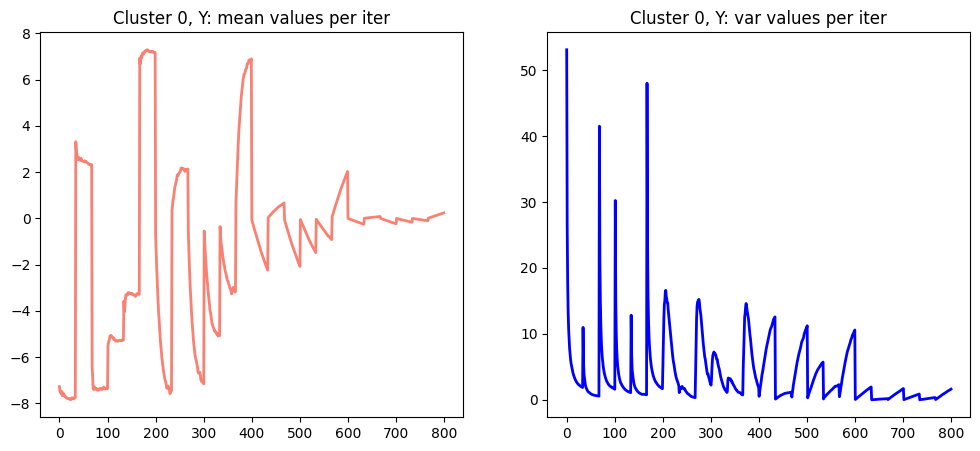

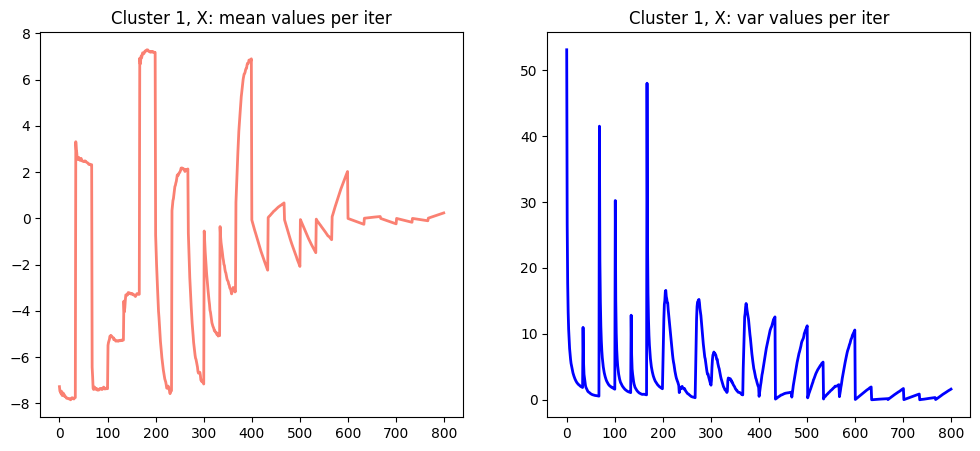

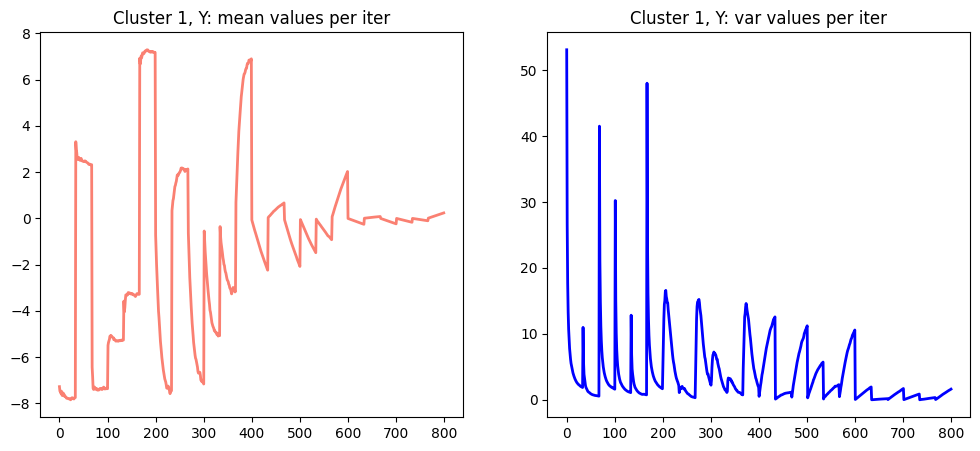

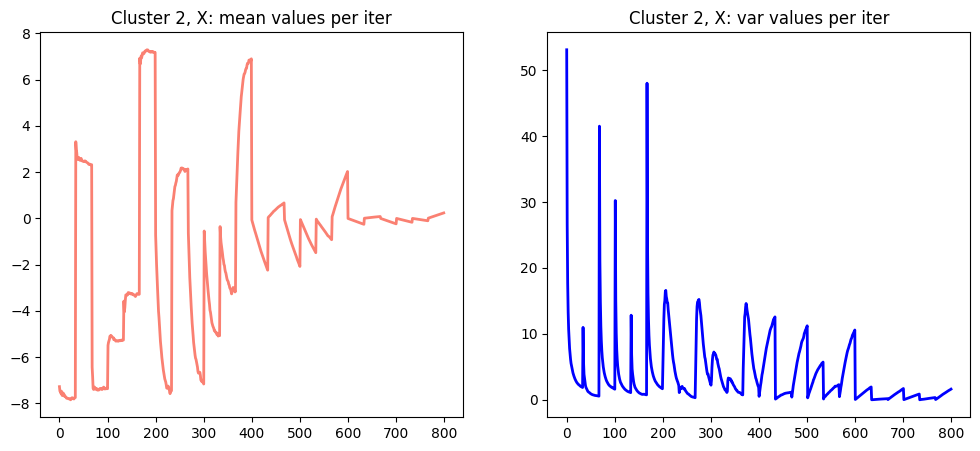

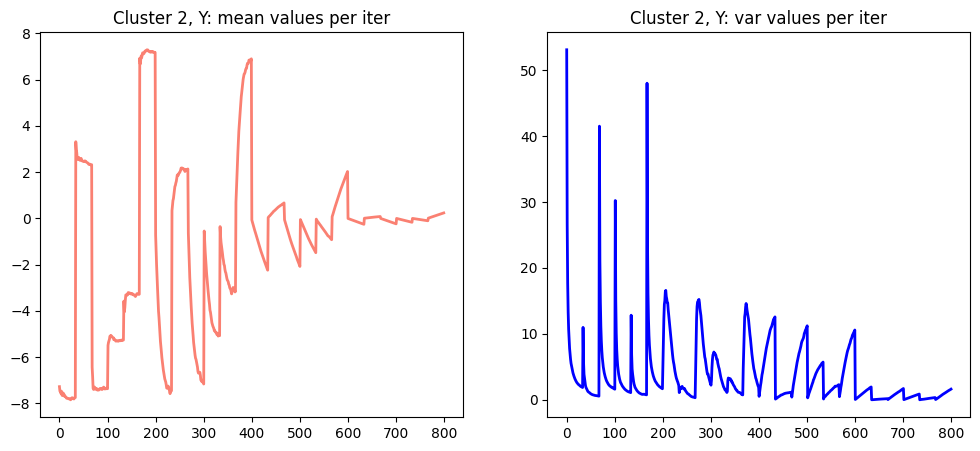

In [ ]:
x_estimators4 = [Estimator() for _ in x_dists]
x_threads = [
    threading.Thread(
        target=estimate,
        args=(dist, lambda x: 0.001, x_estimators4[i]))
    for i, dist in enumerate(x_dists)
]

y_estimators4 = [Estimator() for _ in y_dists]
y_threads = [
    threading.Thread(
        target=estimate,
        args=(dist, lambda x: 0.001, y_estimators4[i]))
    for i, dist in enumerate(y_dists)
]

# Start and wait for threads
[x.start() or y.start() for x, y in zip(x_threads, y_threads)]
[x.join() or y.join() for x, y in zip(x_threads, y_threads)]

for i, (x_estimator, y_estimator) in enumerate(zip(x_estimators4, y_estimators4)):
  showResults(x_estimator, f"Cluster {i}, X")
  showResults(y_estimator, f"Cluster {i}, Y")

## Test Results (First Approximation)

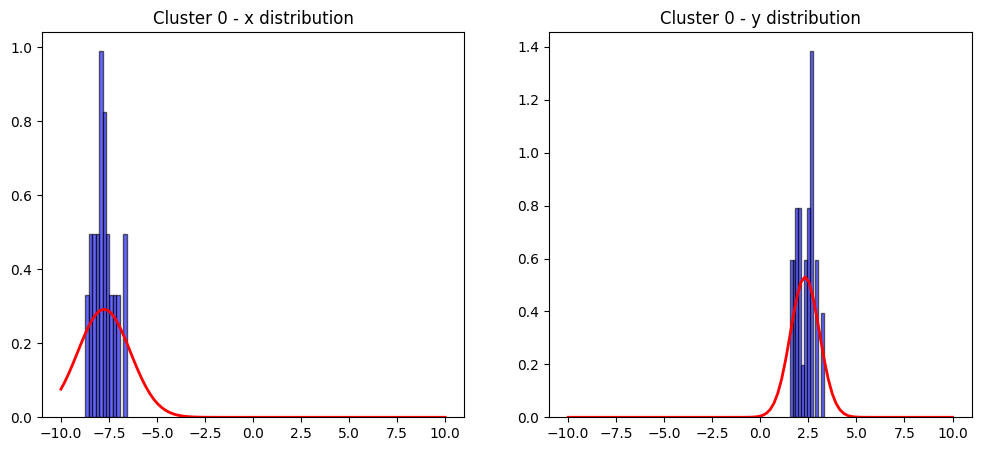

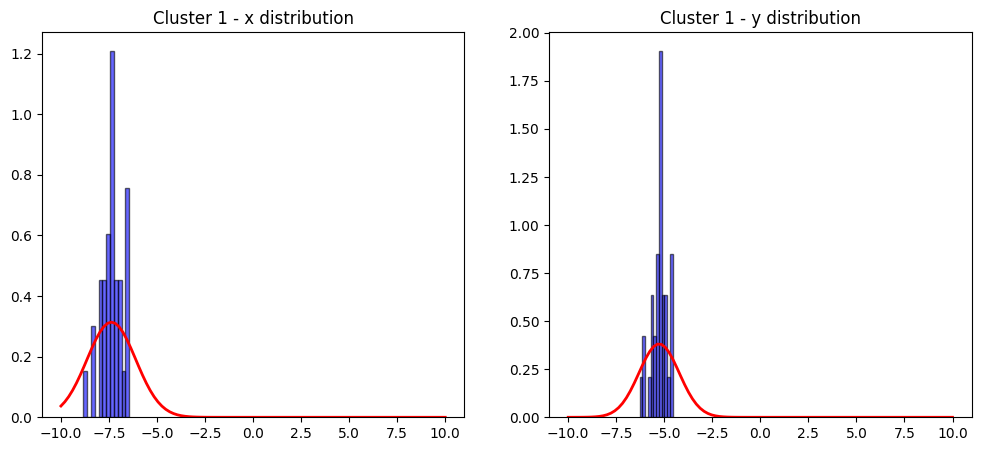

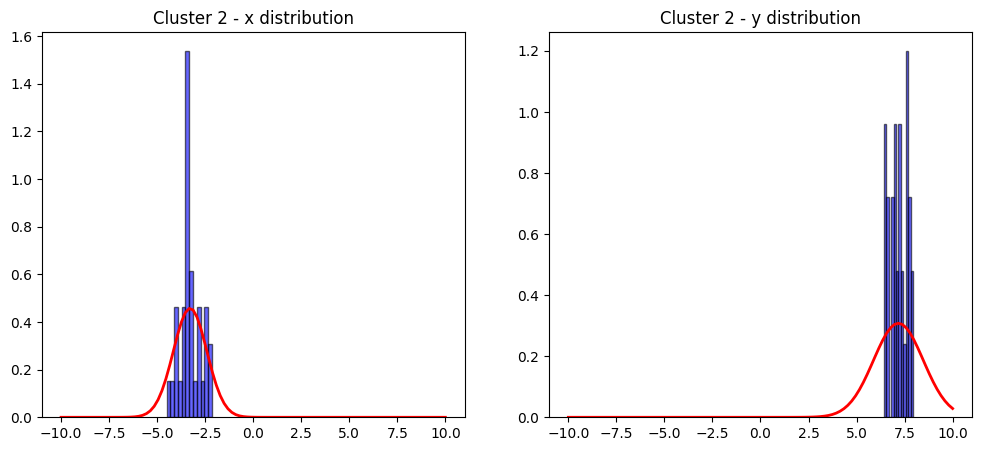

In [ ]:
# Test results against histograms
from scipy.stats import norm

for i, (x_estimator, y_estimator) in enumerate(zip(x_estimators1, y_estimators1)):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  vals = np.linspace(-10, 10, 100)
  # x histogram
  axes[0].hist(x_dists[i],
               bins=12,
               density=True,
               alpha=0.6,
               color='b',
               edgecolor='black',
               label="Data Histogram")
  axes[0].plot(vals,
               norm.pdf(vals, x_estimator.getMean(), x_estimator.getStd()),
               'r',
               linewidth=2,
               label=f"Gaussian")
  axes[0].set_title(f"Cluster {i} - x distribution")
  # y histogram
  axes[1].hist(y_dists[i],
               bins=12,
               density=True,
               alpha=0.6,
               color='b',
               edgecolor='black',
               label="Data Histogram")
  axes[1].plot(vals,
               norm.pdf(vals, y_estimator.getMean(), y_estimator.getStd()),
               'r',
               linewidth=2,
               label=f"Gaussian")
  axes[1].set_title(f"Cluster {i} - y distribution")